Import libraries and declare program constants

In [1]:
import sys
import os
import time
import argparse
import matplotlib.pyplot as plt
from numpy import double

#-----------------------import libraries for Spectrum analyzer----------------#
sys.path.insert(0, os.path.abspath(os.path.join('..') + '/scripts/spec_ana/'))
import sa_fsh8_read_noise_power_density as SA

# -----------------Connection Settings----------------------
SA_HOST = '10.8.88.138'             # fsh8 spectrum analyzer IP temporary
SA_PORT = 5555                      # fsh8 spectrum analyzer port 18? 23?
SA_ADDRESS = (SA_HOST, SA_PORT)

#-----------------SA_FSH8 initialization Variables----------
NUMPOINTS = 631   # Number of measurement points (Max=625)

Input test parameters

In [2]:
freq_start = 0          # the start frequency of the spectrum analyzer (Hz) e.g. 100000000 or 100e6, integer with no units [100 MHz, minimum 9 kHz]
freq_stop = 6e9         # the stop frequency of the spectrum analyzer (Hz) e.g. 2000000000 or 2e9, integer with no units [2 GHz, maximum 8 GHz]
res_bw = 3e6            # the resolution bandwidth of the spectrum analyzer (Hz) e.g. 3000000 or 3e6, integer with no units [3 MHz]
vid_bw = 3e2            # the video bandwidth of the spectrum analyzer (Hz) e.g. 300, integer with no units [30 Hz]
marker_freq = 3e9       # the frequency of interest on the spectrum analyzer (Hz) e.g. 10000000 or 10e6, integer with no units [10 MHz, minimum 9 kHz, maximum 8 GHz]')


Setup the setup the Spectrum Analyzer

In [3]:
#------------------------SA_FSH8 Setup-------------------------#
def setupSA():
    print('/------Setup spectrum analyser---------/')
    specAnal = SA.SA_SOCK()
    specAnal.connectSpecAna((SA_ADDRESS))
    specAnal.setSpecAnaSweep(freq_start, freq_stop, NUMPOINTS)  # Set spectrum analyzer span
    specAnal.setSpecAnaBandwidth('off', res_bw, 'off', vid_bw)  # Set the SA Resolution bandwidth mode to Manual, 100 KHz. Set the Video BW to Manual, 100 KHz 
    specAnal.setSpecAnaAmplitude(-25, 5)                        # Set ref level and attenuator
    print(specAnal.setSpecAnaDetector('rms'))                   # Switch on rms detector
    specAnal.setSpecAnaSweepTime('15s')                         # Set spectrum analyzer sweep
    specAnal.setMarkerFunction(marker_freq)                     # Place marker on the frequency of interest
    print(f'Frequency of Interest = {marker_freq/1e9} GHz')
    print('/------End of Setup Spectrum Analyzer---------/')
    return specAnal
        

In [4]:
#------------------------------ PLOT ---------------------------#
def plotTrace(x_axis, y_axis, x_label, y_label, title, label): 
    ''' Plot response

    This function plots the power vs frequency filter response 

    @params:    
        freq_values: integer list [in Hz]
        power_value: integer list [in dBm]
    '''
    plt.figure(figsize = (10,10))
    plt.plot(x_axis, y_axis, 'r', label = label)
    plt.legend()
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.ylim(ymin = -80) 
    plt.title(title, fontsize = 16)
    plt.grid()
    plt.show()

In [5]:
print('/--------- Running main Code ---------/') 
time.sleep(1) 
SpecAna = setupSA()
time.sleep(1) 
run_time_delay = int(float(SpecAna.requestSpecAnaData('SWE:TIME?').decode()))
print(f'run_time_delay = {run_time_delay} seconds, please wait')
time.sleep(run_time_delay)
noise_dbm_hz = double(SpecAna.requestSpecAnaData('CALC:MARK:FUNC:NOIS:RES?'))
freq_values, pow_values = SpecAna.getSpecAnaTraceParams(freq_start, freq_stop)
print('Power and Frequency Values acquired.')

/--------- Running main Code ---------/
/------Setup spectrum analyser---------/
Connected to: b'Rohde&Schwarz,FSH8,106260/028,V3.30'
SA Start Freq: 0.0 MHz, Stop Freq: 6000.0 MHz, Points: 631
SA RBW set to AUTO 0, RBW = 3000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
SA amplitude reference level set to REF -25.0 dBm
SA input attenuator set to 5.0 dB
SA detector mode set to = RMS
Frequency of Interest = 3.0 GHz
/------End of Setup Spectrum Analyzer---------/
run_time_delay = 15 seconds, please wait
No of Sweep Points = 631
Power and Frequency Values acquired.


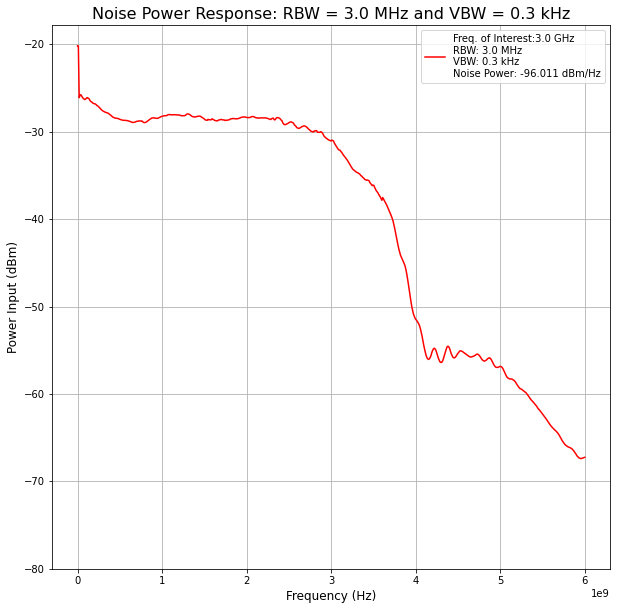

Noise Power Density with:
	Resolution BW : 3.0 MHz
	Video BW : 	0.3 kHz
	Noise Power : 	-96.011 dBm/Hz


In [6]:
# Plot the results
plotTrace(freq_values, pow_values, 'Frequency (Hz)', 'Power Input (dBm)', f'Noise Power Response: RBW = {res_bw/1e6} MHz and VBW = {vid_bw/1e3} kHz', f'Freq. of Interest:{marker_freq/1e9} GHz\nRBW: {res_bw/1e6} MHz\nVBW: {vid_bw/1e3} kHz\nNoise Power: {noise_dbm_hz} dBm/Hz')
print(f'Noise Power Density with:\n\tResolution BW : {res_bw/1e6} MHz\n\tVideo BW : \t{vid_bw/1e3} kHz\n\tNoise Power : \t{noise_dbm_hz} dBm/Hz')

In [7]:
res_bw = [1e6, 3e6, 5e6]            # the resolution bandwidth of the spectrum analyzer (Hz) e.g. 3000000 or 3e6, integer with no units [3 MHz]
vid_bw = [3e2, 10e2, 30e2]          # the video bandwidth of the spectrum analyzer (Hz) e.g. 30, integer with no units [30 Hz]   
marker_freq_list = [10e6, 1.5e9, 3e9]    # the frequency of interest on the spectrum analyzer (Hz) e.g. 10000000 or 10e6, integer with no units [10 MHz, minimum 9 kHz, maximum 8 GHz]')
freq_start = 0                      # the start frequency of the spectrum analyzer (Hz) e.g. 100000000 or 100e6, integer with no units [100 MHz, minimum 9 kHz]
freq_stop = 6e9                     # the stop frequency of the spectrum analyzer (Hz) e.g. 2000000000 or 2e9, integer with no units [2 GHz, maximum 8 GHz]


SA detector mode set to = RMS
SA Start Freq: 0.0 MHz, Stop Freq: 6000.0 MHz, Points: 631
SA amplitude reference level set to REF -25.0 dBm
SA input attenuator set to 5.0 dB
SA RBW set to AUTO 0, RBW = 1000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
Testing with RBW = 1.0 MHz and VBW = 0.3 kHz
/--------- Running main Code ---------/
run_time_delay = 15 seconds, please wait
No of Sweep Points = 631
SA RBW set to AUTO 0, RBW = 1000.0 kHz
SA VBW set to AUTO 0, VBW = 1.0 kHz
Testing with RBW = 1.0 MHz and VBW = 1.0 kHz
/--------- Running main Code ---------/
run_time_delay = 15 seconds, please wait
No of Sweep Points = 631
SA RBW set to AUTO 0, RBW = 1000.0 kHz
SA VBW set to AUTO 0, VBW = 3.0 kHz
Testing with RBW = 1.0 MHz and VBW = 3.0 kHz
/--------- Running main Code ---------/
run_time_delay = 15 seconds, please wait
No of Sweep Points = 631
SA RBW set to AUTO 0, RBW = 3000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
Testing with RBW = 3.0 MHz and VBW = 0.3 kHz
/--------- Running main Code 

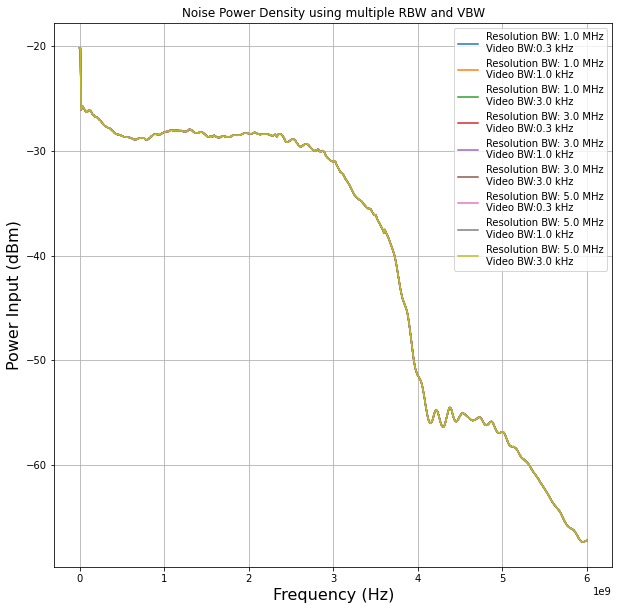

In [8]:
print(SpecAna.setSpecAnaDetector('rms'))                          # Switch on rms detector
SpecAna.setSpecAnaSweep(freq_start, freq_stop, NUMPOINTS)   # Set spectrum analyzer span
SpecAna.setSpecAnaAmplitude(-25, 5)                         # Set ref level and attenuator
SpecAna.setSpecAnaSweepTime('15s')                          # Set spectrum analyzer sweep

# Iterate on different values of RBW and VBW
plt.figure(figsize=(10, 10))
noise_power_values = []
for j in res_bw:
    for k in vid_bw:
        SpecAna.setSpecAnaBandwidth('off', j, 'off', k)
        print(f'Testing with RBW = {j/1e6} MHz and VBW = {k/1e3} kHz')
        print('/--------- Running main Code ---------/') 
        time.sleep(1) 
        
        # Read sweep time to wait for trace to complete
        run_time_delay = int(float(SpecAna.requestSpecAnaData('SWE:TIME?').decode()))
        print(f'run_time_delay = {run_time_delay} seconds, please wait')
        time.sleep(int(run_time_delay))          
            
        # Read trace plot 
        freq_values, pow_values = SpecAna.getSpecAnaTraceParams(freq_start, freq_stop)
        
        time.sleep(0.1)
        
        # Read noise power density from the marker frequencies
        for marker_freq in marker_freq_list:
            SpecAna.setMarkerFunction(marker_freq)
            time.sleep(0.1)   
            
            noise_dbm_hz = double(SpecAna.requestSpecAnaData('CALC:MARK:FUNC:NOIS:RES?'))
            noise_power_values.append(noise_dbm_hz)
            
        # Create plot for each RBW and VBW setting
        plt.plot(freq_values, pow_values, label = f'Resolution BW: {j/1e6} MHz\nVideo BW:{k/1e3} kHz')
            
plt.legend()
plt.xlabel('Frequency (Hz)', fontsize = 16)
plt.ylabel('Power Input (dBm)', fontsize = 16)
plt.title(f'Noise Power Density using multiple RBW and VBW')
plt.grid()


In [9]:
for x, j in enumerate(res_bw):
    for y, k in enumerate(vid_bw):
        print(f'Freq. of Interest: {marker_freq_list[y]/1e9} GHz, \tRBW = {j / 1e6} MHz \tVBW = {k / 1e3} kHz : Noise Power Spectral Density: \t {noise_power_values[x * 3 + y]} dBm/Hz')


Freq. of Interest: 0.01 GHz, 	RBW = 1.0 MHz 	VBW = 0.3 kHz : Noise Power Spectral Density: 	 -88.288 dBm/Hz
Freq. of Interest: 1.5 GHz, 	RBW = 1.0 MHz 	VBW = 1.0 kHz : Noise Power Spectral Density: 	 -93.805 dBm/Hz
Freq. of Interest: 3.0 GHz, 	RBW = 1.0 MHz 	VBW = 3.0 kHz : Noise Power Spectral Density: 	 -96.205 dBm/Hz
Freq. of Interest: 0.01 GHz, 	RBW = 3.0 MHz 	VBW = 0.3 kHz : Noise Power Spectral Density: 	 -88.296 dBm/Hz
Freq. of Interest: 1.5 GHz, 	RBW = 3.0 MHz 	VBW = 1.0 kHz : Noise Power Spectral Density: 	 -93.79 dBm/Hz
Freq. of Interest: 3.0 GHz, 	RBW = 3.0 MHz 	VBW = 3.0 kHz : Noise Power Spectral Density: 	 -96.176 dBm/Hz
Freq. of Interest: 0.01 GHz, 	RBW = 5.0 MHz 	VBW = 0.3 kHz : Noise Power Spectral Density: 	 -88.298 dBm/Hz
Freq. of Interest: 1.5 GHz, 	RBW = 5.0 MHz 	VBW = 1.0 kHz : Noise Power Spectral Density: 	 -93.808 dBm/Hz
Freq. of Interest: 3.0 GHz, 	RBW = 5.0 MHz 	VBW = 3.0 kHz : Noise Power Spectral Density: 	 -96.187 dBm/Hz
